BerkeleyX: Data8.2x

Foundations of Data Science: Inferential Thinking by Resampling

In [1]:
from datascience import *
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Lec 7.2 Performing a Test

In [2]:
scores = Table.read_table('..\..\data\scores_by_section.csv')
scores

Section,Midterm
1,22
2,12
2,23
2,14
1,20
3,25
4,19
1,24
5,8
6,14


In [3]:
scores.group('Section')

Section,count
1,32
2,32
3,27
4,30
5,33
6,32
7,24
8,29
9,30
10,34


In [4]:
scores.group('Section', np.average).show()

Section,Midterm average
1,15.5938
2,15.125
3,13.6667
4,14.7667
5,17.4545
6,15.0312
7,16.625
8,16.3103
9,14.5667
10,15.2353


In [5]:
# Null: The Section 3 average is like the average of 27 random scores from the class.
# Alternative: No, it's too low.

# observed statistic and size
observerd_average = scores.group('Section', np.average).row(2)[1]
observed_size = scores.group('Section').row(2)[1]
observerd_average, observed_size

(13.666666666666666, 27)

In [6]:
# average for observed_size (aka 27) students picked at random
np.average(scores.sample(observed_size, with_replacement=False).column('Midterm'))

16.77777777777778

In [20]:
repetitions = 10000
averages = np.empty(repetitions)

for i in range(repetitions):
    new_average = np.average(scores.sample(observed_size, with_replacement=False).column('Midterm'))
    averages[i] = new_average

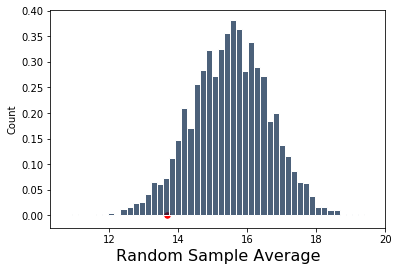

In [21]:
# expected distribution
Table().with_column('Random Sample Average', averages).hist(
    bins = 50, ec='w', normed=None, density=True)

# where the observed statistic was
plt.scatter(observerd_average, 0, color='red', s=30);

# is that good? (meh)

Lec 7.3 Statistical Significance

Tail of a distribution:
- area less than 5% -> **statistical significant**
- area less than 1% -> **highly statistical significant**

P-value (observed significance level):
- chance under null hypothesis 
- the test statistic is
 - equal to the value observed in the data
 - or even further in the direction of the alternative

In [22]:
# calculate the area of left tail in scores distribution
np.count_nonzero(averages <= observerd_average) / repetitions

# slightly over 5%, so we accept the null hypothesis

0.0559

Lec 7.4 An Error Probability

Always remember that conclusion could be wrong

In [24]:
# say that the observed average was just a bit lower
np.count_nonzero(averages <= 13.6) / repetitions

0.0481

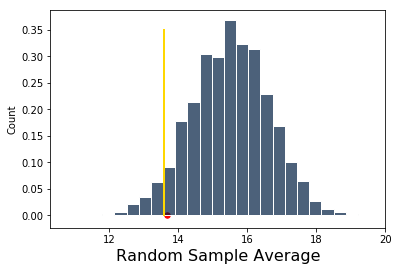

In [25]:
Table().with_column('Random Sample Average', averages).hist(
    bins = 25, ec='w', normed=None, density=True)
plt.scatter(observerd_average, 0, color='red', s=30)
plt.plot([13.6, 13.6], [0, 0.35], color='gold', lw=2);